In [1]:
import os
import dandelion as ddl
# change directory to somewhere more workable

ddl.logging.print_header()

dandelion==0.2.4 pandas==1.3.5 numpy==1.21.6 matplotlib==3.5.3 networkx==2.7.1 scipy==1.7.3


In [21]:
import scirpy as ir
ir.__version__

'0.11.1'

In [2]:
import pandas as pd
import numpy as np
import scanpy as sc
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata

warnings.filterwarnings('ignore')
sc.logging.print_header()

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.10.2 pynndescent==0.5.7


In [6]:
# Set directories
code_dir = "~/code/10X_bcr_vdj_example/"
data_dir = "~/data/10X_bcr_vdj_example/"

os.chdir('/home/jupyter/')

In [14]:
vdj_dir = data_dir+"airr_rearrangement.tsv"

# Read in 10X AIRR output as a danelion object
vdj = ddl.read_10x_airr(pd.read_csv(vdj_dir, sep="\t"))
vdj

Dandelion class object with n_obs = 1115 and n_contigs = 2262
    data: 'cell_id', 'clone_id', 'sequence_id', 'sequence', 'sequence_aa', 'productive', 'rev_comp', 'v_call', 'v_cigar', 'd_call', 'd_cigar', 'j_call', 'j_cigar', 'c_call', 'c_cigar', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'junction_length', 'junction_aa_length', 'v_sequence_start', 'v_sequence_end', 'd_sequence_start', 'd_sequence_end', 'j_sequence_start', 'j_sequence_end', 'c_sequence_start', 'c_sequence_end', 'consensus_count', 'duplicate_count', 'is_cell', 'locus', 'rearrangement_status'
    metadata: 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_B_VDJ', 'd_call_B_VDJ', 'j_call_B_VDJ', 'v_call_B_VJ', 'j_call_B_VJ', 'c_call_B_VDJ', 'c_call_B_VJ', 'productive_B_VDJ', 'productiv

In [37]:
vdj.metadata.groupby("isotype_status").count()

,clone_id,clone_id_by_size,locus_VDJ,locus_VJ,productive_VDJ,productive_VJ,v_call_VDJ,d_call_VDJ,j_call_VDJ,v_call_VJ,...,c_call_B_VJ,productive_B_VDJ,productive_B_VJ,duplicate_count_B_VDJ,duplicate_count_B_VJ,isotype,locus_status,chain_status,rearrangement_status_VDJ,rearrangement_status_VJ
isotype_status,,,,,,,,,,,,,,,,,,,,,
IgA,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
IgD,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,14,16,16,16,16,16
IgG,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
IgM,986,986,986,986,986,986,986,986,986,986,...,986,986,986,986,983,986,986,986,986,986
Multi,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
None,27,27,27,27,27,27,27,27,27,27,...,27,27,27,0,27,27,27,27,27,27


In [15]:
# Identify clonaltypes using CDR3 sequence information
ddl.tl.find_clones(vdj)
vdj

Finding clones based on B cell VDJ chains : 100%|██████████| 164/164 [00:00<00:00, 2021.86it/s]
Refining clone assignment based on VJ chain pairing : 100%|██████████| 1088/1088 [00:00<00:00, 188757.56it/s]


Dandelion class object with n_obs = 1115 and n_contigs = 2262
    data: 'cell_id', 'clone_id', 'sequence_id', 'sequence', 'sequence_aa', 'productive', 'rev_comp', 'v_call', 'v_cigar', 'd_call', 'd_cigar', 'j_call', 'j_cigar', 'c_call', 'c_cigar', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'junction_length', 'junction_aa_length', 'v_sequence_start', 'v_sequence_end', 'd_sequence_start', 'd_sequence_end', 'j_sequence_start', 'j_sequence_end', 'c_sequence_start', 'c_sequence_end', 'consensus_count', 'duplicate_count', 'is_cell', 'locus', 'rearrangement_status'
    metadata: 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_B_VDJ', 'd_call_B_VDJ', 'j_call_B_VDJ', 'v_call_B_VJ', 'j_call_B_VJ', 'c_call_B_VDJ', 'c_call_B_VJ', 'productive_B_VDJ', 'productiv

In [16]:
vdj.metadata

,clone_id,clone_id_by_size,locus_VDJ,locus_VJ,productive_VDJ,productive_VJ,v_call_VDJ,d_call_VDJ,j_call_VDJ,v_call_VJ,...,productive_B_VDJ,productive_B_VJ,duplicate_count_B_VDJ,duplicate_count_B_VJ,isotype,isotype_status,locus_status,chain_status,rearrangement_status_VDJ,rearrangement_status_VJ
AAACCTGAGGGCTCTC-1,B_159_3_2_124_1_2,37,IGH,IGL,T,T,IGHV4-61,None,IGHJ5,IGLV1-40,...,T,T,14.0,60.0,IgM,IgM,IGH + IGL,Single pair,standard,standard
AAACCTGGTAAGGATT-1,B_18_1_3_92_2_5,876,IGH,IGK,T,T,IGHV1-2,None,IGHJ5,IGKV4-1,...,T,T,20.0,28.0,IgM,IgM,IGH + IGK,Single pair,standard,standard
AAACCTGGTAATAGCA-1,B_46_1_2_149_1_1,783,IGH,IGL,T,T,IGHV1-18,IGHD6-13,IGHJ5,IGLV1-44,...,T,T,60.0,42.0,IgM,IgM,IGH + IGL,Single pair,standard,standard
AAACCTGGTACGCACC-1,B_4_2_1_29_3_1,782,IGH,IGL,T,T,IGHV7-4-1,None,IGHJ4,IGLV7-46,...,T,T,61.0,38.0,IgM,IgM,IGH + IGL,Single pair,standard,standard
AAACCTGTCCAACCAA-1,B_35_6_5_50_2_7|B_35_6_5_99_1_1|B_63_3_2_50_2_...,778|779|780|781,IGH|IGH,IGK|IGL,T|T,T|T,IGHV3-23|IGHV3-15,None,IGHJ4|IGHJ4,IGKV4-1|IGLV6-57,...,T|T,T|T,76.0,77.0,IgM|IgM,Multi,Extra VDJ + Extra VJ,Extra pair,standard,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTATGCTCATAAAGG-1,B_86_3_2_86_2_6,392,IGH,IGL,T,T,IGHV4-59,None,IGHJ4,IGLV2-14,...,T,T,8.0,60.0,IgM,IgM,IGH + IGL,Single pair,standard,standard
TTTGCGCTCTGAAAGA-1,B_13_7_2_158_1_1|B_13_7_2_22_2_1,390|391,IGH,IGL|IGK,T,T|T,IGHV3-33,IGHD2-2,IGHJ6,IGLV3-9|IGKV5-2,...,T,T|T,49.0,95.0,IgG,IgG,IGH + Extra VJ,Extra pair,standard,standard
TTTGGTTCATCTCGCT-1,B_44_5_1_90_2_1,389,IGH,IGL,T,T,IGHV5-51,None,IGHJ4,IGLV7-43,...,T,T,13.0,43.0,IgG,IgG,IGH + IGL,Single pair,standard,standard
TTTGGTTCATTAGGCT-1,B_54_3_2_83_2_6,388,IGH,IGL,T,T,IGHV3-7,None,IGHJ4,IGLV1-47,...,T,T,10.0,34.0,IgG,IgG,IGH + IGL,Single pair,standard,standard


In [18]:
# Generate network graph
ddl.tl.generate_network(vdj, key="clone_id")

Setting up data: 2262it [00:00, 5961.29it/s]
Linking edges : 100%|██████████| 1086/1086 [00:00<00:00, 118512.14it/s]


In [27]:
irdata_s = ir.io.read_airr('data/10X_bcr_vdj_example/airr_rearrangement.tsv')
irdata_s

AnnData object with n_obs × n_vars = 1115 × 0
    obs: 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive', 'IR_VDJ_2_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 'has_ir'
    uns: 'scirpy_version'

In [30]:
ir.tl.chain_qc(irdata_s)
ir.pp.ir_dist(irdata_s, metric = 'hamming', sequence="aa")
ir.tl.define_clonotypes(irdata_s)
irdata_s

100%|██████████| 1113/1113 [00:04<00:00, 262.33it/s]


AnnData object with n_obs × n_vars = 1115 × 0
    obs: 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive', 'IR_VDJ_2_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 'has_ir', 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_

In [31]:
irdata_s.obs['scirpy_clone_id'] = irdata_s.obs['clone_id'] # stash it
ddl.tl.transfer(irdata_s, vdj, overwrite = True) # overwrite scirpy's clone_id definition

<AxesSubplot:>

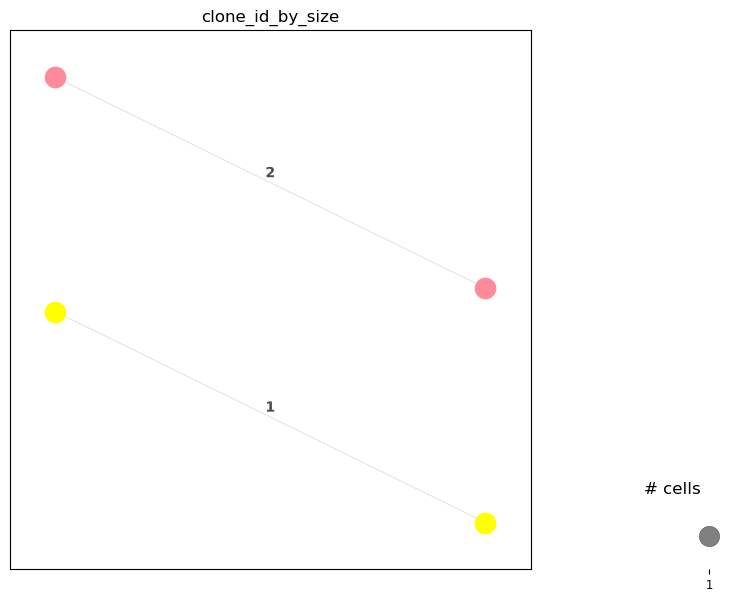

In [32]:
ddl.tl.transfer(irdata_s, vdj, clone_key = 'clone_id_by_size')
ir.tl.clonotype_network(irdata_s, clonotype_key= 'clone_id_by_size', min_cells = 2)
ir.pl.clonotype_network(irdata_s, color = 'clone_id_by_size', panel_size=(7,7))